<a href="https://colab.research.google.com/github/Hackmey/Botify/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set seed for reproducibility
np.random.seed(42)

# Generate random data
num_hospitals = 5000
hospital_ids = np.arange(1, num_hospitals + 1)
costs = np.random.randint(500, 5000, size=num_hospitals)
beds_available = np.random.randint(1, 200, size=num_hospitals)
ratings = np.round(np.random.uniform(1.0, 5.0, size=num_hospitals), 1)
distances = np.random.randint(1, 100, size=num_hospitals)

# List of diseases
diseases = [
    "Alzheimer's", "Arthritis", "Asthma", "Blood Pressure", "Cancer", "Cholesterol",
    "Chronic Pain", "Cold & Flu", "Depression", "Diabetes", "Digestion", "Eyesight",
    "Health & Living", "Healthy Kids", "Hearing & Ear", "Heart", "HIV/AIDS",
    "Infectious Disease", "Lung Conditions", "Medications", "Menopause", "Mental Health",
    "Migraine", "Neurology", "Oral Health", "Pregnancy", "Senior Health", "Sexual Health",
    "Skin", "Sleep", "Thyroid"
]

# Randomly assign a disease to each hospital
assigned_diseases = np.random.choice(diseases, size=num_hospitals)

# Create DataFrame
hospitals_data = pd.DataFrame({
    'hospital_id': hospital_ids,
    'cost': costs,
    'beds_available': beds_available,
    'rating': ratings,
    'distance': distances,
    'disease': assigned_diseases
})

# Save DataFrame to Google Drive
from google.colab import drive
drive.mount('/content/drive')
hospitals_data.to_csv('/content/drive/My Drive/hospitals_large_with_diseases.csv', index=False)

print(hospitals_data.head())

# Load data
hospitals = pd.read_csv('/content/drive/My Drive/hospitals_large_with_diseases.csv')


<ipython-input-22-87cd590e5219>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hospitals['rating'],rug=False)


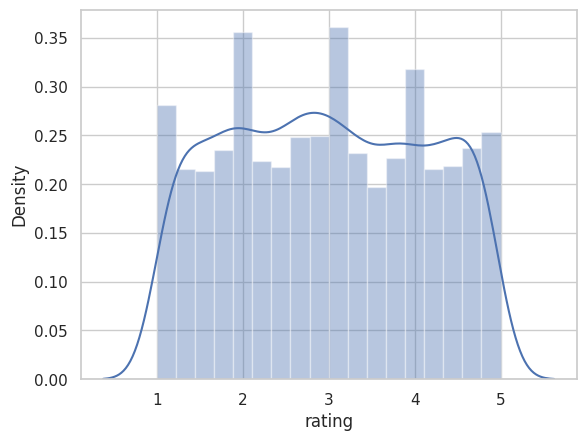

In [ ]:
import seaborn as sns
sns.distplot(hospitals['rating'],rug=False)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from google.colab import drive

# Load data
hospitals = pd.read_csv('/content/drive/My Drive/hospitals_large_with_diseases.csv')

# One-hot encode the disease column
encoder = OneHotEncoder(sparse_output=False)
disease_encoded = encoder.fit_transform(hospitals[['disease']])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

<ipython-input-28-d8675abf7905>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='disease', data=hospitals, palette = 'cubehelix')


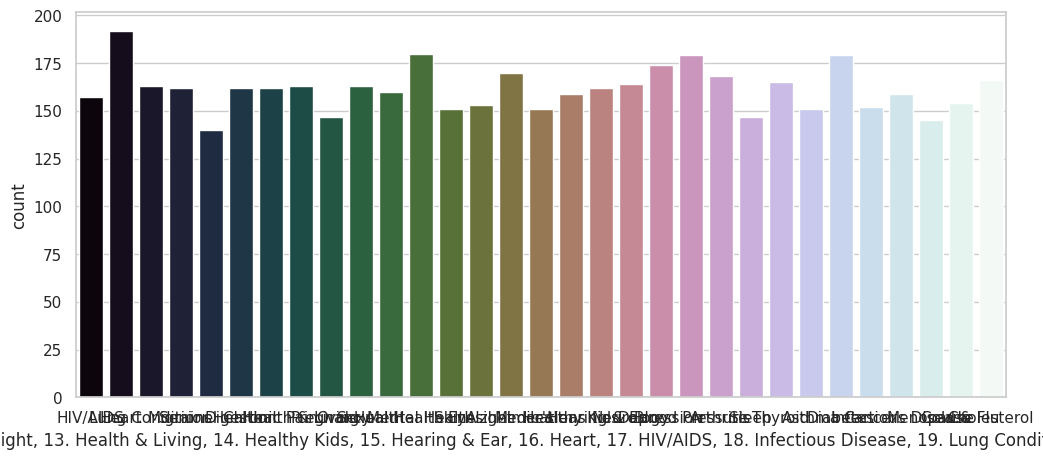

In [ ]:
plt.figure(num=None, figsize=(12, 5))
sns.countplot(x='disease', data=hospitals, palette = 'cubehelix')
plt.xlabel("common diseases (1. Alzheimer's, 2. Arthritis, 3. Asthma, 4. Blood Pressure, 5. Cancer, 6. Cholesterol, 7. Chronic Pain, 8. Cold & Flu, 9. Depression, 10. Diabetes, 11. Digestion, 12. Eyesight, 13. Health & Living, 14. Healthy Kids, 15. Hearing & Ear, 16. Heart, 17. HIV/AIDS, 18. Infectious Disease, 19. Lung Conditions, 20. Medications, 21. Menopause, 22. Mental Health, 23. Migraine, 24. Neurology, 25. Oral Health, 26. Pregnancy, 27. Senior Health, 28. Sexual Health, 29. Skin, 30. Sleep, 31. Thyroid)")

plt.show()

<ipython-input-35-8851e66f0356>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='disease', data=hospitals, palette='cubehelix')


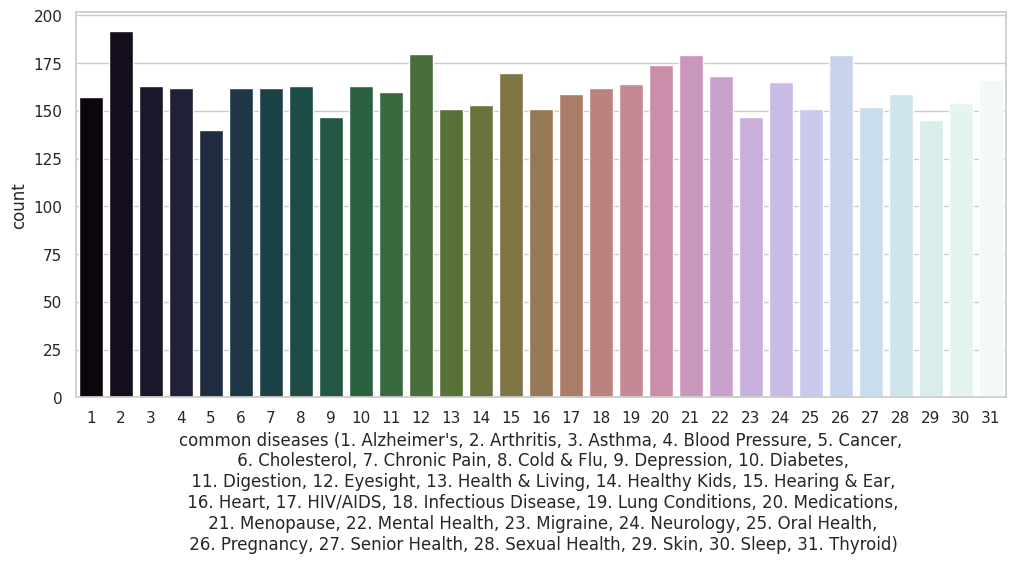

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hospitals' is your DataFrame and 'disease' is the column with disease names.
# First, create the count plot
plt.figure(num=None, figsize=(12, 5))

sns.countplot(x='disease', data=hospitals, palette='cubehelix')


# Get the list of unique diseases and assign numbers as labels
disease_names = hospitals['disease'].unique()
number_labels = range(1, len(disease_names) + 1)

# Set the x-tick labels to numbers
plt.xticks(ticks=range(len(disease_names)), labels=number_labels)
plt.xlabel("common diseases (1. Alzheimer's, 2. Arthritis, 3. Asthma, 4. Blood Pressure, 5. Cancer,\n 6. Cholesterol, 7. Chronic Pain, 8. Cold & Flu, 9. Depression, 10. Diabetes,\n 11. Digestion, 12. Eyesight, 13. Health & Living, 14. Healthy Kids, 15. Hearing & Ear,\n 16. Heart, 17. HIV/AIDS, 18. Infectious Disease, 19. Lung Conditions, 20. Medications,\n 21. Menopause, 22. Mental Health, 23. Migraine, 24. Neurology, 25. Oral Health,\n 26. Pregnancy, 27. Senior Health, 28. Sexual Health, 29. Skin, 30. Sleep, 31. Thyroid)")

plt.show()


<ipython-input-37-8191d20d73c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=hospitals,palette = 'rainbow')


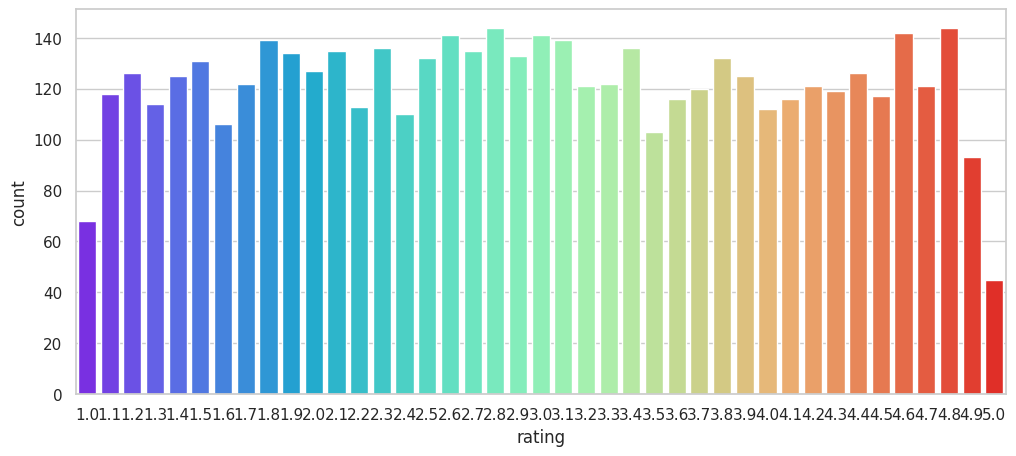

In [ ]:
plt.figure(num=None, figsize=(12, 5))
sns.countplot(x='rating', data=hospitals,palette = 'rainbow')
plt.show()

In [ ]:

# Combine the encoded disease data with other features
features = np.hstack((hospitals[['cost', 'beds_available', 'rating', 'distance']].values, disease_encoded))

# Targets
y = hospitals['hospital_id'].values

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(features.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Function to recommend hospital for each disease
def recommend_hospital(input_criteria):
    recommended_hospital = model.predict(input_criteria)
    return int(recommended_hospital[0][0])

# Capture recommendations for each disease over epochs
epoch_intervals = range(0, 1000, 100)  # Checkpoints at every 10 epochs
recommendations_over_epochs = {epoch: {} for epoch in epoch_intervals}

for epoch in epoch_intervals:
    if epoch > 0:
        model.fit(features, y, epochs=epoch, initial_epoch=epoch-100, verbose=0)

    for disease in diseases:
        input_criteria = np.array([[200, 10, 4.0, 5] + [1 if d == disease else 0 for d in diseases]])
        recommended_hospital_id = recommend_hospital(input_criteria)
        recommendations_over_epochs[epoch][disease] = recommended_hospital_id

# Convert to DataFrame for easier plotting
recommendations_df = pd.DataFrame(recommendations_over_epochs).T
print(recommendations_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━

In [ ]:
# Capture recommendations for each disease over small epochs
epoch_intervals = range(0, 150, 10)  # Checkpoints at every 10 epochs
recommendations_over_epochs = {epoch: {} for epoch in epoch_intervals}

for epoch in epoch_intervals:
    if epoch > 0:
        model.fit(features, y, epochs=epoch, initial_epoch=epoch-10, verbose=0)

    for disease in diseases:
        input_criteria = np.array([[1700, 170, 3.0, 5] + [1 if d == disease else 0 for d in diseases]])
        recommended_hospital_id = recommend_hospital(input_criteria)
        recommendations_over_epochs[epoch][disease] = recommended_hospital_id

# Convert to DataFrame for easier plotting
recommendations_df = pd.DataFrame(recommendations_over_epochs).T
print(recommendations_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

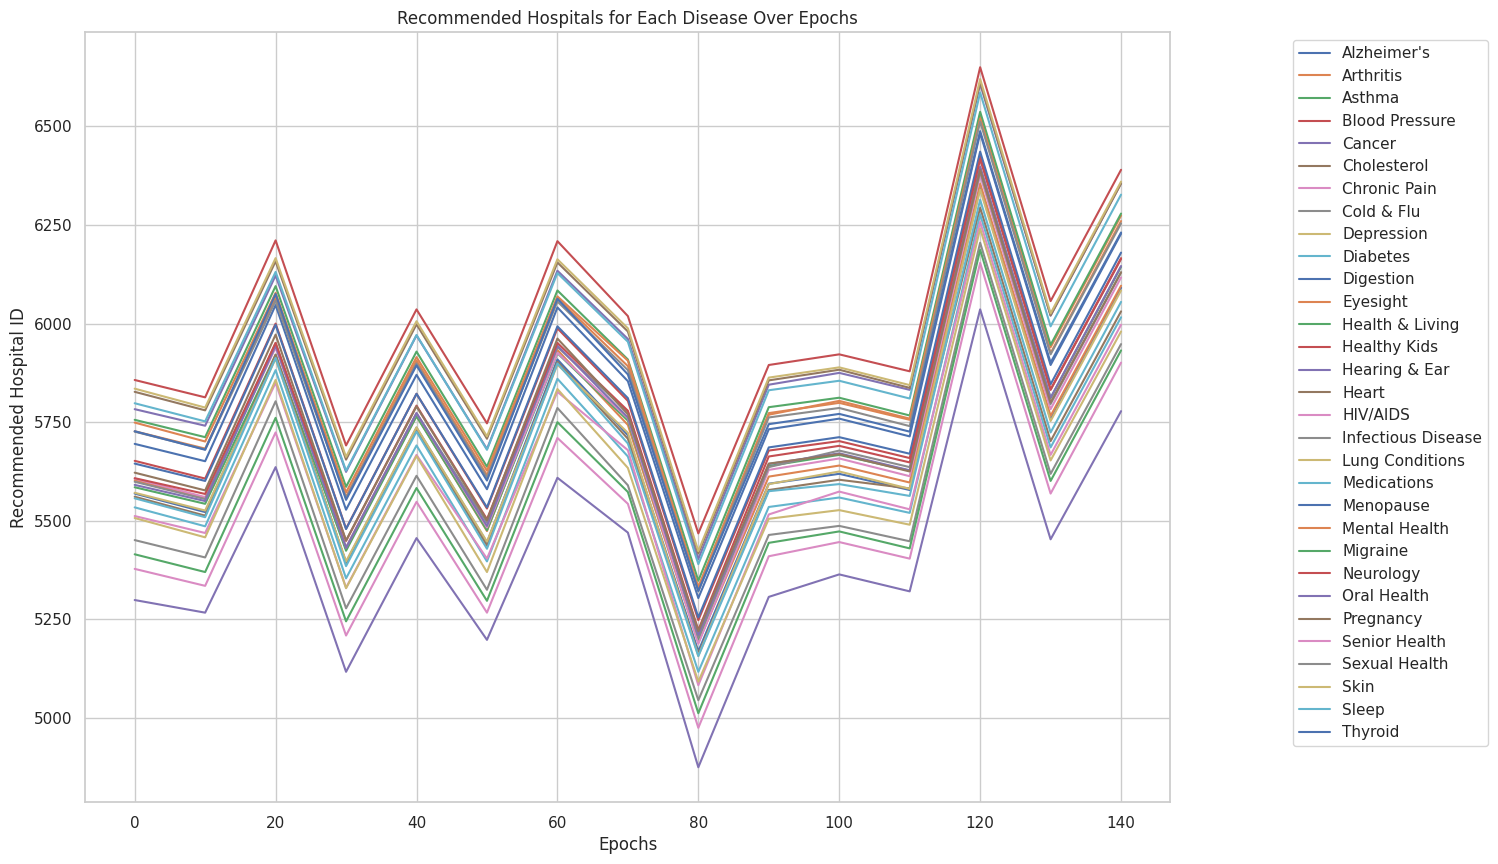

In [ ]:
# Plotting recommendations for each disease over epochs
plt.figure(figsize=(14, 10))
for disease in diseases:
  plt.plot(recommendations_df.index, recommendations_df[disease], label=disease)
plt.xlabel('Epochs')
plt.ylabel('Recommended Hospital ID')
plt.title('Recommended Hospitals for Each Disease Over Epochs')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

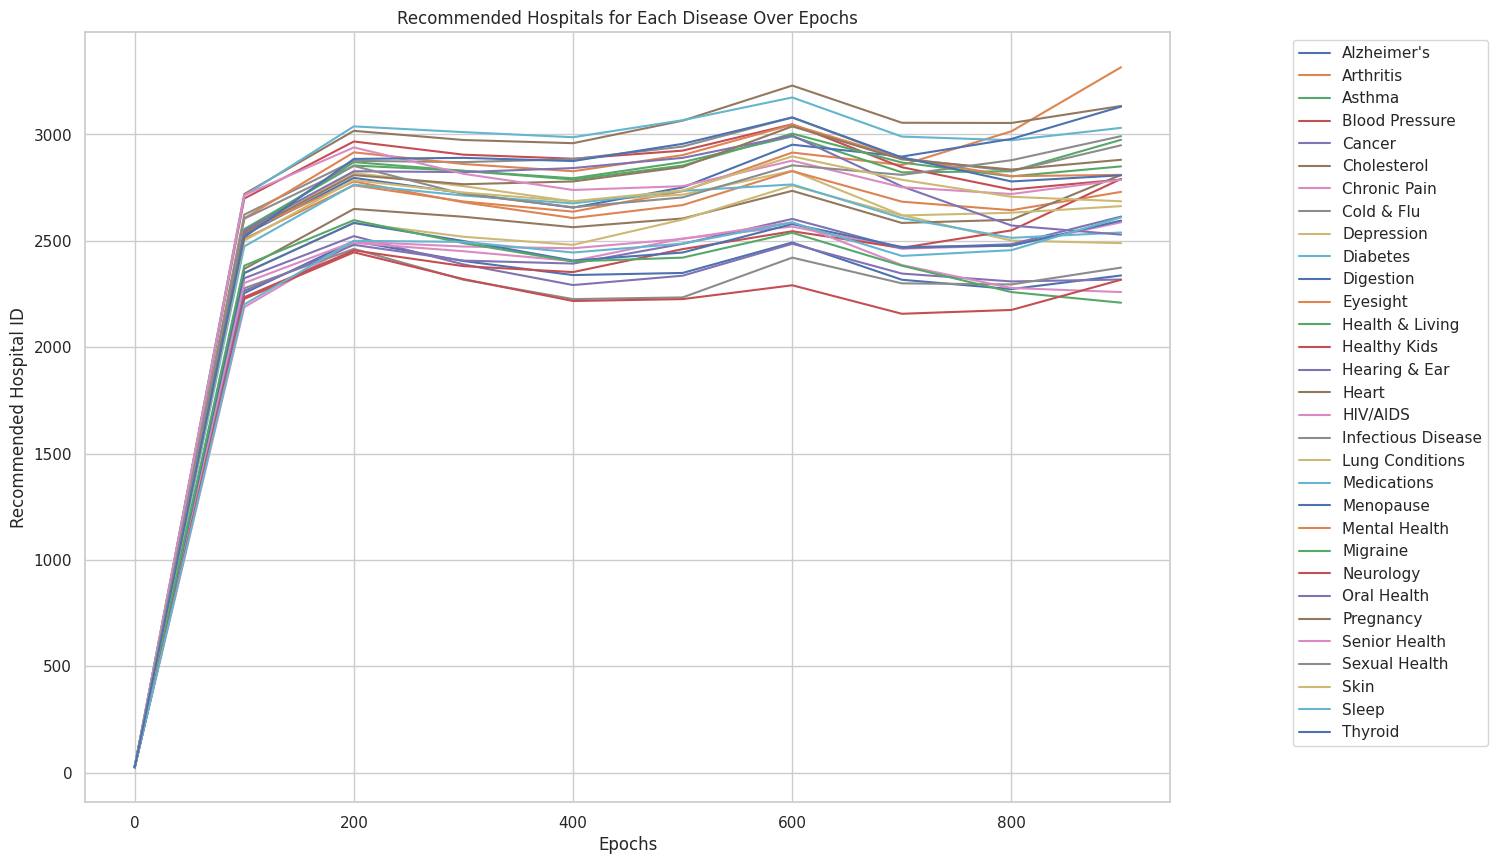

In [ ]:
recommendations_df = pd.DataFrame(recommendations_over_epochs).T
# Plotting recommendations for each disease over epochs
plt.figure(figsize=(14, 10))
for disease in diseases:
  plt.plot(recommendations_df.index, recommendations_df[disease], label=disease)
plt.xlabel('Epochs')
plt.ylabel('Recommended Hospital ID')
plt.title('Recommended Hospitals for Each Disease Over Epochs')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

In [ ]:
# Function to recommend hospital for multiple diseases
def recommend_hospitals_for_diseases(diseases):
    recommendations = {}
    for disease in diseases:
        input_criteria = np.array([[3000, 100, 3.0, 10] + [1 if d == disease else 0 for d in diseases]])
        recommended_hospital_id = recommend_hospital(input_criteria)
        recommendations[disease] = recommended_hospital_id
    return recommendations

# Find recommended hospitals for all diseases
recommended_hospitals = recommend_hospitals_for_diseases(diseases)
for disease, hospital_id in recommended_hospitals.items():
    print(f"Recommended Hospital for {disease}: {hospital_id}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━